In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import math
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("display.max_rows", 100, "display.max_columns", 100)
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def p(s):
    print(s)
    
pd.DataFrame.len = pd.Index.len = lambda x: print(len(x))

In [2]:
# Common function definitions
def graphRes(act, pred):
    ax = plt.gca()
    for pos in positions:
        ax.scatter(act[pos],pred[pos], label=f'{pos} ({r2_score(act[pos], pred[pos]).round(2)})')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels)
    ax.plot(act['QB'],act['QB'],color='black') # y==x reference line
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

def printStats(y_dev, y_pred):
    graphRes(y_dev, y_pred)

    stats = pd.DataFrame(index = [positions], columns = ['MAE','RMSE','R^2'])
    for pos in positions:
        stats.loc[pos,'MAE'] = mean_absolute_error(y_dev[pos], y_pred[pos]).round(1)
        stats.loc[pos,'RMSE'] = round(math.sqrt(mean_squared_error(y_dev[pos], y_pred[pos])),1)
        stats.loc[pos,'R^2'] = r2_score(y_dev[pos], y_pred[pos]).round(2)
    
    display(stats)
    
def cvGrid(params):
    names = ['param_' + x for x in list(params.keys())]
    return pd.DataFrame(grid.cv_results_)[names+['mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time','std_fit_time','std_score_time']].sort_values(names)


In [4]:
# Partition training, dev, and test data
positions = ['QB','RB','WR','TE']
X_train, X_dev, X_test = {}, {}, {}
y_train, y_dev, y_test = {}, {}, {}
data = {}
for pos in positions:
    Xy = pd.read_csv(f'../{pos}.csv').dropna(subset=['fanPts'])
    data[pos] = Xy
    X = Xy.loc[:,Xy.columns.str.contains('-\d+') | Xy.columns.str.match('fanPts')] \
        .drop('fanPts',axis=1) \
        .fillna(0)
    y = Xy.fanPts
    
    # Split
    X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.3, random_state=0)
    X_dev_raw, X_test_raw, y_dev_raw, y_test_raw = train_test_split(X_test_raw, y_test_raw, test_size=0.5, random_state=0)
    
    # Scale X data
    ss = preprocessing.StandardScaler()
    X_train[pos] = pd.DataFrame(ss.fit_transform(X_train_raw), columns=X_train_raw.columns)
    X_dev[pos] = pd.DataFrame(ss.fit_transform(X_dev_raw), columns=X_dev_raw.columns)
    X_test[pos] = pd.DataFrame(ss.fit_transform(X_test_raw), columns=X_test_raw.columns)
    
    # Leave y data in original units
    y_train[pos] = y_train_raw
    y_dev[pos] = y_dev_raw
    y_test[pos] = y_test_raw

### K Neighbors Regression

#### Base model

,MAE,RMSE,R^2
QB,70.900,89.000,0.330
RB,44.800,68.400,0.300
WR,39.600,60.100,0.320
TE,23.300,32.300,0.400


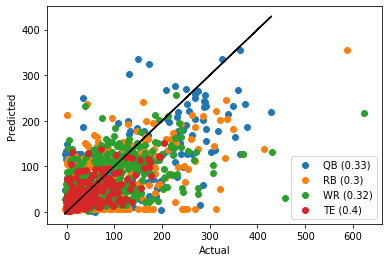

In [5]:
y_pred = {}
for pos in positions:
    m = neighbors.KNeighborsRegressor()
    m.fit(X_train[pos],y_train[pos])
    y_pred[pos] = m.predict(X_dev[pos])
    
printStats(y_dev, y_pred)

#### GridSearchCV

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 1888 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   28.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.3min finished


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1888 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   28.5s finished


QB: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
RB: {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
WR: {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}
TE: {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}


,MAE,RMSE,R^2
QB,61.700,82.700,0.420
RB,43.300,65.900,0.350
WR,38.400,57.600,0.370
TE,21.900,31.900,0.420


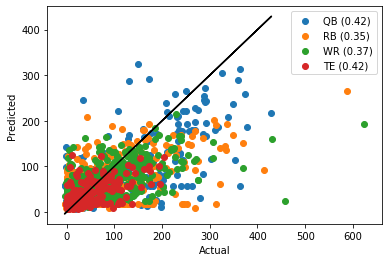

In [6]:
y_pred = {}
bestParams = {}
for pos in positions:
    params = {
        'weights':['distance','uniform'],
        'metric':['manhattan','euclidean'],
        'n_neighbors':[x for x in range(1,101)],
    }

    grid = GridSearchCV(
        neighbors.KNeighborsRegressor(),
        params,
        n_jobs = -1,
        verbose = 7,
        cv = 5
    ).fit(X_train[pos],y_train[pos])

    bestParams[pos] = grid.best_params_

    m = neighbors.KNeighborsRegressor(**grid.best_params_)
    m.fit(X_train[pos],y_train[pos])
    y_pred[pos] = m.predict(X_dev[pos])

    #cvGrid(params)
    
for pos in positions:
    print(f'{pos}: {bestParams[pos]}')
printStats(y_dev,y_pred)